# Feature Engineering & Model Trials – Lucía

## Objective
This notebook focuses on exploring the merged dataset, engineering meaningful features, and testing baseline models to predict packaging quality.

## Scope
- Understand and preprocess key variables
- Create and test new features
- Train baseline models (LogReg, Random Forest, etc.)
- Compare initial performance and select best direction


## **STEP 0 - LIBRARIES IMPORT**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

## **STEP 1 - DATA COLLECTION & BASIC UNDERSTANDING**

In [100]:
df = pd.read_csv("merged_df.csv") 

In [102]:
df.head()

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,Size,Collection,Avg_BadPackagingRate (Sup),Avg_Incidents_PerMonth (Sup),Avg_CostPerIncident_Scorecard (Sup),Avg_OnTimeDeliveryRate (Sup),Avg_Anomalies_PerMonth (Sup),Avg_CostImpact_Product (ProdRef),UnresolvedRate_Product (ProdRef),Total_Incidents_Product (ProdRef)
0,RPT0160152,PRD09822,2024-06-30,Supplierd,Sweater,Cotton,0.83,18.0,Method1,LAYOUTD,...,L,Summer,32.317222,151.111111,534.160000,66.401667,29.277778,511.666667,0.0,3.0
1,RPT0483795,PRD00275,2024-06-30,Suppliera,Dress,Silk,0.35,32.0,Method3,LAYOUTC,...,L,Winter,15.645556,57.537037,558.516296,82.579444,7.259259,354.375000,0.0,2.0
2,RPT0358190,PRD08605,2024-06-30,Supplierc,Dress,Cotton,0.52,17.0,Method1,LAYOUTC,...,L,Summer,24.183889,92.722222,549.542500,72.973333,16.416667,328.500000,0.0,2.0
3,RPT0483823,PRD04922,2024-06-30,Supplierb,Sweater,Silk,0.51,11.0,Method3,LAYOUTB,...,M,Summer,17.606111,91.750000,504.592500,81.120833,14.000000,521.900000,0.2,5.0
4,RPT0047981,PRD03954,2024-06-30,Supplierg,Shirt,Linen,0.19,47.0,Method3,LAYOUTA,...,M,Winter,17.524444,45.055556,587.881667,79.781667,7.833333,272.750000,0.0,4.0


In [103]:
# Basic Dataset Statistics
display(df.info())  
display(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494847 entries, 0 to 494846
Data columns (total 22 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ReportID                             494847 non-null  object 
 1   ProductReference                     494847 non-null  object 
 2   DateOfReport                         494847 non-null  object 
 3   SupplierName                         494847 non-null  object 
 4   GarmentType                          494847 non-null  object 
 5   Material                             494847 non-null  object 
 6   Weight                               494847 non-null  float64
 7   ProposedUnitsPerCarton               494847 non-null  float64
 8   ProposedFoldingMethod                494847 non-null  object 
 9   ProposedLayout                       494847 non-null  object 
 10  PackagingQuality                     494847 non-null  object 
 11  ProductName  

None

,Weight,ProposedUnitsPerCarton,Avg_BadPackagingRate (Sup),Avg_Incidents_PerMonth (Sup),Avg_CostPerIncident_Scorecard (Sup),Avg_OnTimeDeliveryRate (Sup),Avg_Anomalies_PerMonth (Sup),Avg_CostImpact_Product (ProdRef),UnresolvedRate_Product (ProdRef),Total_Incidents_Product (ProdRef)
count,494847.000000,494847.000000,494847.000000,494847.000000,494847.000000,494847.000000,494847.000000,494847.000000,494847.000000,494847.000000
mean,0.460948,100.184963,21.196508,81.303662,541.699172,77.041342,13.299460,444.826862,0.083684,2.258389
std,0.349676,865.887116,5.819821,30.747500,26.791532,5.732561,6.667101,433.312317,0.213198,3.993976
min,0.080000,-3.000000,15.645556,25.638889,504.592500,66.401667,4.916667,0.000000,0.000000,0.000000
25%,0.210000,16.000000,15.645556,57.537037,530.019722,72.973333,7.259259,174.000000,0.000000,1.000000
50%,0.330000,25.000000,17.606111,89.444444,549.542500,81.120833,14.000000,324.000000,0.000000,2.000000
75%,0.620000,32.000000,24.183889,92.722222,558.516296,82.579444,16.416667,566.250000,0.000000,3.000000
max,2.320000,9999.000000,32.317222,151.111111,619.556389,82.579444,29.277778,2485.000000,1.000000,40.000000


### Understanding Packaging Quality

In this project, our **target variable** is `Packaging Quality`, a binary label with two possible outcomes:

- `Good` → Packaging met quality standards  
- `Bad` → Packaging was flagged due to issues or non-compliance

The goal is to build a predictive model that helps identify patterns behind poor packaging performance. This will support the business in:

- Gaining insights into key drivers of packaging failures  
- Improving packaging decisions based on data  
- Enhancing overall supply chain quality and efficiency

C:\Users\lucia\AppData\Local\Temp\ipykernel_38520\3565739657.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=colors)


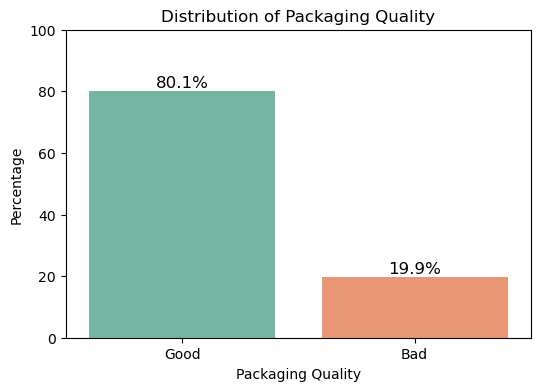

In [104]:
# Count of Packaging Quality values
quality_counts = df['PackagingQuality'].value_counts(normalize=True) * 100

# Custom colors: Green for Good, Red for Bad
colors = ['#66c2a5', '#fc8d62']

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=colors)
plt.xlabel("Packaging Quality")
plt.ylabel("Percentage")
plt.title("Distribution of Packaging Quality")
plt.ylim(0, 100)

# Show % labels
for i, value in enumerate(quality_counts.values):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', fontsize=12)

plt.show()


## **STEP 2 - DATA PREPROCESSING & FEATURE ENGINEERING**

### 2.1 - Data Quality Check & Understanding the Variables

In [105]:
# Count unique values per column
display(df.nunique())

ReportID                               494847
ProductReference                        10000
DateOfReport                              547
SupplierName                                8
GarmentType                                12
Material                                    6
Weight                                    199
ProposedUnitsPerCarton                     50
ProposedFoldingMethod                       4
ProposedLayout                              6
PackagingQuality                            2
ProductName                               357
Size                                        5
Collection                                  4
Avg_BadPackagingRate (Sup)                  8
Avg_Incidents_PerMonth (Sup)                8
Avg_CostPerIncident_Scorecard (Sup)         8
Avg_OnTimeDeliveryRate (Sup)                8
Avg_Anomalies_PerMonth (Sup)                8
Avg_CostImpact_Product (ProdRef)         3839
UnresolvedRate_Product (ProdRef)           21
Total_Incidents_Product (ProdRef) 

In [106]:
df.head()

,ReportID,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,...,Size,Collection,Avg_BadPackagingRate (Sup),Avg_Incidents_PerMonth (Sup),Avg_CostPerIncident_Scorecard (Sup),Avg_OnTimeDeliveryRate (Sup),Avg_Anomalies_PerMonth (Sup),Avg_CostImpact_Product (ProdRef),UnresolvedRate_Product (ProdRef),Total_Incidents_Product (ProdRef)
0,RPT0160152,PRD09822,2024-06-30,Supplierd,Sweater,Cotton,0.83,18.0,Method1,LAYOUTD,...,L,Summer,32.317222,151.111111,534.160000,66.401667,29.277778,511.666667,0.0,3.0
1,RPT0483795,PRD00275,2024-06-30,Suppliera,Dress,Silk,0.35,32.0,Method3,LAYOUTC,...,L,Winter,15.645556,57.537037,558.516296,82.579444,7.259259,354.375000,0.0,2.0
2,RPT0358190,PRD08605,2024-06-30,Supplierc,Dress,Cotton,0.52,17.0,Method1,LAYOUTC,...,L,Summer,24.183889,92.722222,549.542500,72.973333,16.416667,328.500000,0.0,2.0
3,RPT0483823,PRD04922,2024-06-30,Supplierb,Sweater,Silk,0.51,11.0,Method3,LAYOUTB,...,M,Summer,17.606111,91.750000,504.592500,81.120833,14.000000,521.900000,0.2,5.0
4,RPT0047981,PRD03954,2024-06-30,Supplierg,Shirt,Linen,0.19,47.0,Method3,LAYOUTA,...,M,Winter,17.524444,45.055556,587.881667,79.781667,7.833333,272.750000,0.0,4.0


### Variable Dictionary

| Column                                | Description                                                                                     |
|---------------------------------------|-------------------------------------------------------------------------------------------------|
| `ReportID`                            | Unique report identifier                                                                        |
| `ProductReference`                    | Product-level identifier (10,000 unique values). Each is linked to a single `ProductName`.     |
| `DateOfReport`                        | Date when the report was generated, ranging from January 1, 2023, to June 30, 2024. There are 547 unique values, one per calendar day in that range. |
| `SupplierName`                        | Supplier responsible for packaging. There are 8 suppliers: Suppliera, Supplierb, Supplierc, Supplierd, Suppliere, Supplierf, Supplierg, Supplierh. |
| `GarmentType`, `Material`, `Weight`  | Product specifications                                                                          |
| `ProposedUnitsPerCarton`             | Recommended number of units per carton to optimize efficiency                                   |
| `ProposedFoldingMethod`, `ProposedLayout` | Packaging configuration suggestions                                                        |
| `ProductName`                         | Product descriptive label. 357 unique values grouped from 10,000 product references (1:1 relationship) |
| `Size`, `Collection`                 | Product descriptors. `Collection` includes 4 seasonal values: Summer, Winter, Spring, Autumn    |
| `PackagingQuality`                   | Target variable: Good or Bad                                                                    |
| `Avg_BadPackagingRate (Sup)`         | Avg. % of bad packaging for the supplier                                                        |
| `Avg_Incidents_PerMonth (Sup)`       | Avg. incidents/month for supplier                                                               |
| `Avg_CostPerIncident_Scorecard (Sup)`| Avg. cost per supplier incident                                                                 |
| `Avg_OnTimeDeliveryRate (Sup)`       | Avg. on-time delivery rate                                                                      |
| `Avg_Anomalies_PerMonth (Sup)`       | Avg. anomalies/month from inspections                                                           |
| `Avg_CostImpact_Product (ProdRef)`   | Avg. cost of incidents for this product                                                         |
| `UnresolvedRate_Product (ProdRef)`   | % of unresolved incidents                                                                       |
| `Total_Incidents_Product (ProdRef)`  | Total historical incidents                                                                      |

**Note:** Variables marked with `(Sup)` are aggregated at the supplier level. Variables with `(ProdRef)` are aggregated at the product reference level.


### 2.2 - Feature Engineering

#### 2.2.1 - Dropping Unnecessary Columns
To make the dataset cleaner, unnecessary initial columns will be removed. However, during further analysis, woth the correlation matrix will help determine which columns are necessary for further modeling.

##### A. Dropping `ReportID` for Modeling

The `ReportID` column is a unique identifier with no predictive value.  
It will be excluded from modeling to avoid unnecessary noise, but stored separately so we can reattach it later when interpreting model outputs (e.g., identifying high-risk products).

In [107]:
# Store ReportID before dropping
report_ids = df['ReportID'].copy()

# Drop it from modeling dataframe
df = df.drop(columns=['ReportID'])

In [108]:
df.head()

,ProductReference,DateOfReport,SupplierName,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality,...,Size,Collection,Avg_BadPackagingRate (Sup),Avg_Incidents_PerMonth (Sup),Avg_CostPerIncident_Scorecard (Sup),Avg_OnTimeDeliveryRate (Sup),Avg_Anomalies_PerMonth (Sup),Avg_CostImpact_Product (ProdRef),UnresolvedRate_Product (ProdRef),Total_Incidents_Product (ProdRef)
0,PRD09822,2024-06-30,Supplierd,Sweater,Cotton,0.83,18.0,Method1,LAYOUTD,Good,...,L,Summer,32.317222,151.111111,534.160000,66.401667,29.277778,511.666667,0.0,3.0
1,PRD00275,2024-06-30,Suppliera,Dress,Silk,0.35,32.0,Method3,LAYOUTC,Good,...,L,Winter,15.645556,57.537037,558.516296,82.579444,7.259259,354.375000,0.0,2.0
2,PRD08605,2024-06-30,Supplierc,Dress,Cotton,0.52,17.0,Method1,LAYOUTC,Good,...,L,Summer,24.183889,92.722222,549.542500,72.973333,16.416667,328.500000,0.0,2.0
3,PRD04922,2024-06-30,Supplierb,Sweater,Silk,0.51,11.0,Method3,LAYOUTB,Bad,...,M,Summer,17.606111,91.750000,504.592500,81.120833,14.000000,521.900000,0.2,5.0
4,PRD03954,2024-06-30,Supplierg,Shirt,Linen,0.19,47.0,Method3,LAYOUTA,Bad,...,M,Winter,17.524444,45.055556,587.881667,79.781667,7.833333,272.750000,0.0,4.0


##### B. Dropping `ProductReference` for Modeling

`ProductReference` is a high-cardinality product ID with no direct predictive power.  
It is excluded from the modeling dataset to prevent overfitting or noise, but saved separately in case we need to map predictions back to individual products.

In [109]:
# Store ProductReference separately
product_refs = df['ProductReference'].copy()

# Drop from modeling dataset
df = df.drop(columns=['ProductReference'])

#### 2.2.2

##### A. Extracting features from `DateOfReport`

We derive time-based features (month, day of week, weekend) from `DateOfReport` to capture potential temporal effects. The original column is dropped afterward.


In [110]:
# Convert to datetime just in case
df['DateOfReport'] = pd.to_datetime(df['DateOfReport'], errors='coerce')

# Extract features
df['Month'] = df['DateOfReport'].dt.month
df['DayOfWeek'] = df['DateOfReport'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Drop the original column
df.drop(columns=['DateOfReport'], inplace=True)

##### B. Encoding

`SupplierName` is a nominal categorical variable with 8 unique values.  
We apply one-hot encoding to convert it into binary features.


In [111]:
# One-hot encode SupplierName and join back to df
supplier_dummies = pd.get_dummies(df['SupplierName'], prefix='Supplier')

# Drop original column and add encoded columns
df = df.drop(columns=['SupplierName'])
df = pd.concat([df, supplier_dummies], axis=1)

In [112]:
df.head()

,GarmentType,Material,Weight,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality,ProductName,Size,Collection,...,DayOfWeek,IsWeekend,Supplier_Suppliera,Supplier_Supplierb,Supplier_Supplierc,Supplier_Supplierd,Supplier_Suppliere,Supplier_Supplierf,Supplier_Supplierg,Supplier_Supplierh
0,Sweater,Cotton,0.83,18.0,Method1,LAYOUTD,Good,Sweater Cotton L,L,Summer,...,6,1,False,False,False,True,False,False,False,False
1,Dress,Silk,0.35,32.0,Method3,LAYOUTC,Good,Dress Silk L,L,Winter,...,6,1,True,False,False,False,False,False,False,False
2,Dress,Cotton,0.52,17.0,Method1,LAYOUTC,Good,Dress Cotton L,L,Summer,...,6,1,False,False,True,False,False,False,False,False
3,Sweater,Silk,0.51,11.0,Method3,LAYOUTB,Bad,Sweater Silk M,M,Summer,...,6,1,False,True,False,False,False,False,False,False
4,Shirt,Linen,0.19,47.0,Method3,LAYOUTA,Bad,Shirt Linen M,M,Winter,...,6,1,False,False,False,False,False,False,True,False


`GarmentType` includes 12 product categories (e.g., Shirt, Dress, Hoodie).  
We apply one-hot encoding to preserve category information for modeling.

In [113]:
# One-hot encode GarmentType
garment_dummies = pd.get_dummies(df['GarmentType'], prefix='Garment')

# Drop original column and add dummies
df = df.drop(columns=['GarmentType'])
df = pd.concat([df, garment_dummies], axis=1)

`Collection` contains 4 seasonal categories.  
We apply one-hot encoding to convert it into binary variables.


In [114]:
# One-hot encode Collection
collection_dummies = pd.get_dummies(df['Collection'], prefix='Collection')

# Drop original column and add encoded columns
df = df.drop(columns=['Collection'])
df = pd.concat([df, collection_dummies], axis=1)

`Material` includes 6 distinct fabric types (e.g., Cotton, Wool, Silk).  
We apply one-hot encoding to retain this information in the model.

In [115]:
# One-hot encode Material
material_dummies = pd.get_dummies(df['Material'], prefix='Material')

# Drop original column and add dummies
df = df.drop(columns=['Material'])
df = pd.concat([df, material_dummies], axis=1)

##### Encoding Packaging Configuration

- `ProposedUnitsPerCarton`: numerical → keep as-is (can scale later if needed)
- `ProposedFoldingMethod`: 4 categories (Method1–Method4) → one-hot encoding
- `ProposedLayout`: 6 layouts (LAYOUTA–LAYOUTF) → one-hot encoding

In [116]:
# One-hot encode ProposedFoldingMethod and ProposedLayout
folding_dummies = pd.get_dummies(df['ProposedFoldingMethod'], prefix='Folding')
layout_dummies = pd.get_dummies(df['ProposedLayout'], prefix='Layout')

# Drop original columns and add encoded ones
df.drop(columns=['ProposedFoldingMethod', 'ProposedLayout'], inplace=True)
df = pd.concat([df, folding_dummies, layout_dummies], axis=1)

##### Dropping `ProductName` and Encoding `Size`

- `ProductName`: high cardinality (357 values), text-heavy → dropped
- `Size`: only 5 categories (e.g., XS, S, M, L, XL) → one-hot encoding


In [117]:
# Drop ProductName (too specific and high cardinality)
df.drop(columns=['ProductName'], inplace=True)

# One-hot encode Size
size_dummies = pd.get_dummies(df['Size'], prefix='Size')

# Drop original column and add encoded features
df.drop(columns=['Size'], inplace=True)
df = pd.concat([df, size_dummies], axis=1)

##### Encoding Target Variable: `PackagingQuality`

`PackagingQuality` is a binary classification target with values: `Good` and `Bad`.  
We map them to 0 (`Good`) and 1 (`Bad`) for modeling.

In [118]:
# Encode target variable: Good → 0, Bad → 1
df['PackagingQuality'] = df['PackagingQuality'].map({'Good': 0, 'Bad': 1})

In [119]:
df.head()

,Weight,ProposedUnitsPerCarton,PackagingQuality,Avg_BadPackagingRate (Sup),Avg_Incidents_PerMonth (Sup),Avg_CostPerIncident_Scorecard (Sup),Avg_OnTimeDeliveryRate (Sup),Avg_Anomalies_PerMonth (Sup),Avg_CostImpact_Product (ProdRef),UnresolvedRate_Product (ProdRef),...,Layout_LAYOUTB,Layout_LAYOUTC,Layout_LAYOUTD,Layout_LAYOUTE,Layout_LAYOUT_OTHER,Size_L,Size_M,Size_S,Size_XL,Size_XS
0,0.83,18.0,0,32.317222,151.111111,534.160000,66.401667,29.277778,511.666667,0.0,...,False,False,True,False,False,True,False,False,False,False
1,0.35,32.0,0,15.645556,57.537037,558.516296,82.579444,7.259259,354.375000,0.0,...,False,True,False,False,False,True,False,False,False,False
2,0.52,17.0,0,24.183889,92.722222,549.542500,72.973333,16.416667,328.500000,0.0,...,False,True,False,False,False,True,False,False,False,False
3,0.51,11.0,1,17.606111,91.750000,504.592500,81.120833,14.000000,521.900000,0.2,...,True,False,False,False,False,False,True,False,False,False
4,0.19,47.0,1,17.524444,45.055556,587.881667,79.781667,7.833333,272.750000,0.0,...,False,False,False,False,False,False,True,False,False,False


##### Scaling Numerical Features

`Weight` and the supplier/product-level averages are continuous numerical variables.  
They will be standardized later using `StandardScaler` during model training if required (e.g., for Logistic Regression or SVM).

In [120]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494847 entries, 0 to 494846
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Weight                               494847 non-null  float64
 1   ProposedUnitsPerCarton               494847 non-null  float64
 2   PackagingQuality                     494847 non-null  int64  
 3   Avg_BadPackagingRate (Sup)           494847 non-null  float64
 4   Avg_Incidents_PerMonth (Sup)         494847 non-null  float64
 5   Avg_CostPerIncident_Scorecard (Sup)  494847 non-null  float64
 6   Avg_OnTimeDeliveryRate (Sup)         494847 non-null  float64
 7   Avg_Anomalies_PerMonth (Sup)         494847 non-null  float64
 8   Avg_CostImpact_Product (ProdRef)     494847 non-null  float64
 9   UnresolvedRate_Product (ProdRef)     494847 non-null  float64
 10  Total_Incidents_Product (ProdRef)    494847 non-null  float64
 11  Month        

None

In [121]:
df.dtypes.reset_index().rename(columns={'index': 'Column', 0: 'DataType'})

,Column,DataType
0,Weight,float64
1,ProposedUnitsPerCarton,float64
2,PackagingQuality,int64
3,Avg_BadPackagingRate (Sup),float64
4,Avg_Incidents_PerMonth (Sup),float64
5,Avg_CostPerIncident_Scorecard (Sup),float64
6,Avg_OnTimeDeliveryRate (Sup),float64
7,Avg_Anomalies_PerMonth (Sup),float64
8,Avg_CostImpact_Product (ProdRef),float64
9,UnresolvedRate_Product (ProdRef),float64


## **STEP 3 - CORRELATION ANALYSIS & BASELINE MODELING**

### 3.1 Correlation Matrix  
We generate a correlation matrix to explore the linear relationships between numerical features.  
This helps identify multicollinearity and provides initial insight into variable importance.

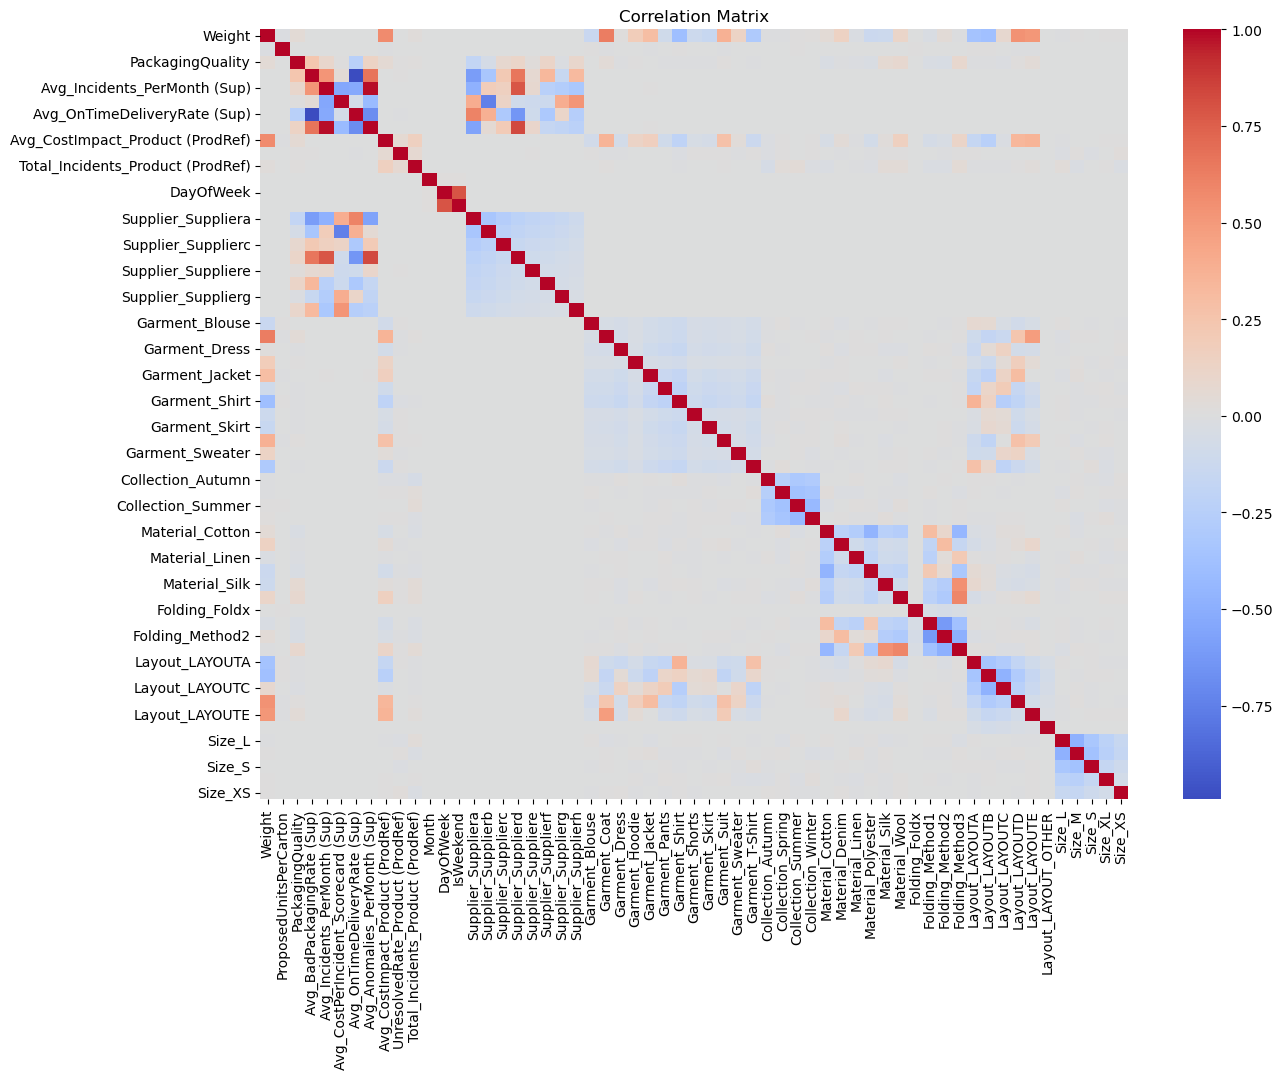

In [122]:
# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

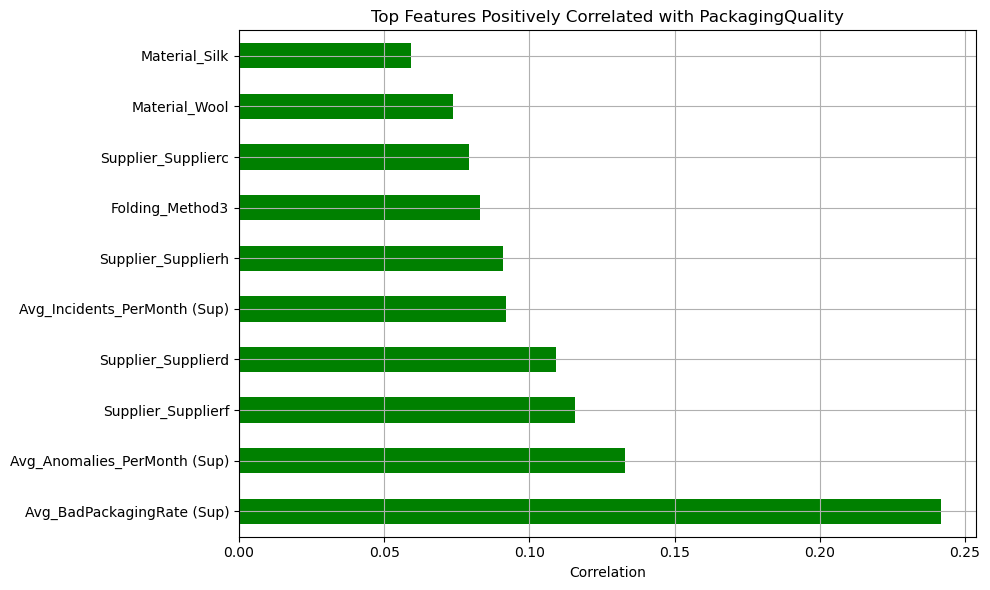

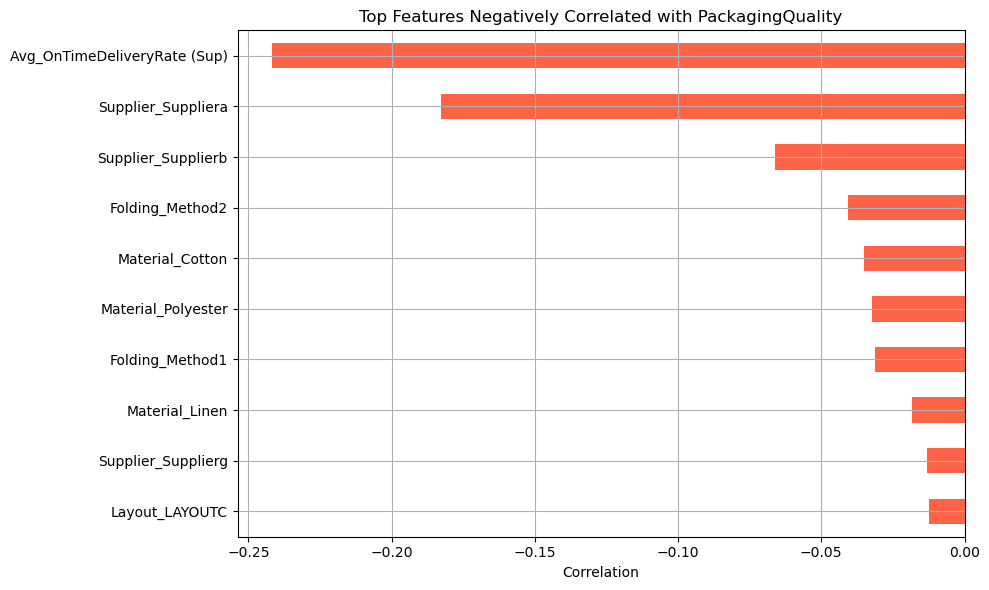

In [123]:
# Compute correlation with target
target_corr = df.corr()['PackagingQuality'].drop('PackagingQuality').sort_values(ascending=False)

# Plot top 15 positive and negative correlations
plt.figure(figsize=(10, 6))
target_corr.head(10).plot(kind='barh', color='green', label='Most positively correlated')
plt.title('Top Features Positively Correlated with PackagingQuality')
plt.xlabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
target_corr.tail(10).plot(kind='barh', color='tomato', label='Most negatively correlated')
plt.title('Top Features Negatively Correlated with PackagingQuality')
plt.xlabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()


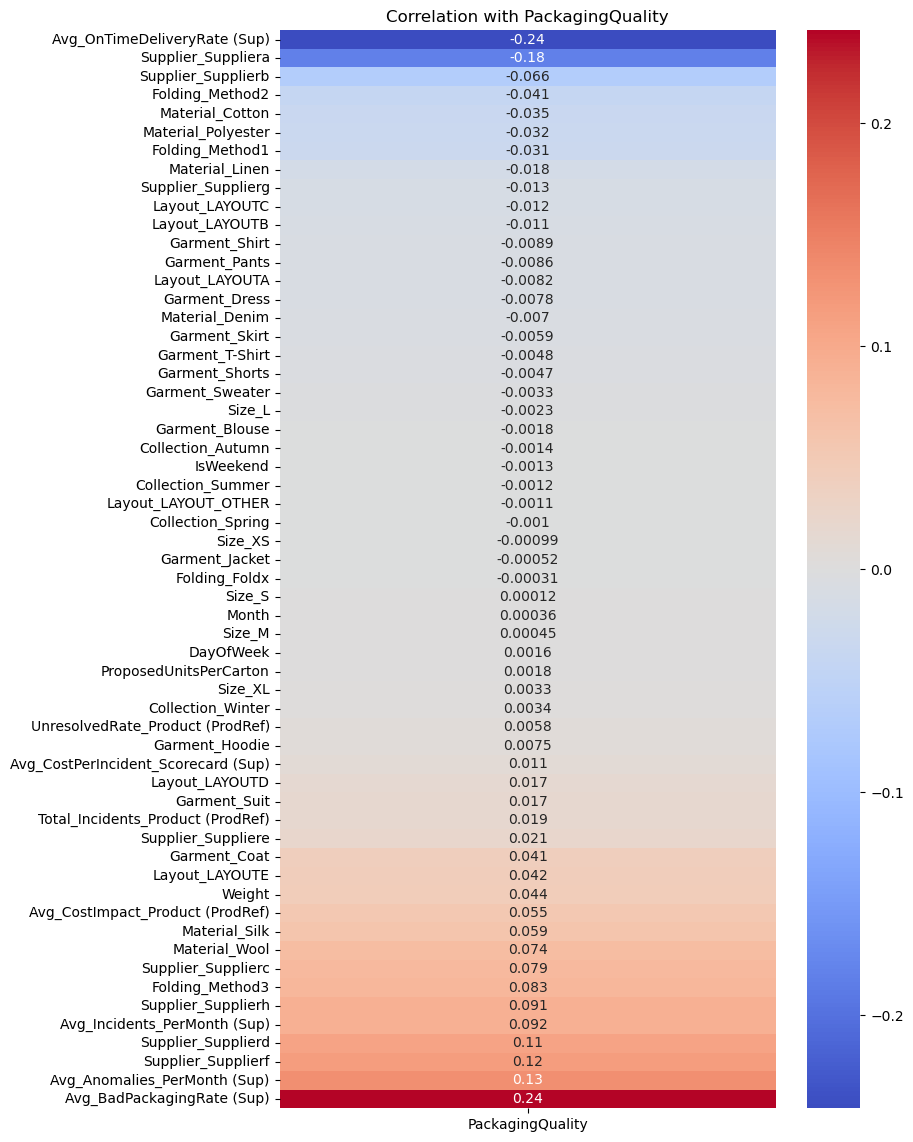

In [124]:
# Convert everything to numeric
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute full correlation matrix
cor_matrix = df_numeric.corr(numeric_only=True)

# Extract correlation with target (if it exists)
if 'PackagingQuality' in cor_matrix.columns:
    target_corr = cor_matrix['PackagingQuality'].drop(labels=['PackagingQuality'], errors='ignore').dropna().sort_values()

    if not target_corr.empty:
        # Plot heatmap
        plt.figure(figsize=(8, 14))
        sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
        plt.title("Correlation with PackagingQuality")
        plt.show()
    else:
        print("No features with valid correlation to PackagingQuality.")
else:
    print("PackagingQuality not found in the correlation matrix.")

### 3.2 Train-Test Split and Baseline Models  

In [125]:
# Define X and y
X = df.drop(columns=['PackagingQuality'])
y = df['PackagingQuality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


c:\Users\lucia\anaconda3\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[78775   375]
 [19476   344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     79150
           1       0.48      0.02      0.03     19820

    accuracy                           0.80     98970
   macro avg       0.64      0.51      0.46     98970
weighted avg       0.74      0.80      0.72     98970



In [126]:
df.head()


,Weight,ProposedUnitsPerCarton,PackagingQuality,Avg_BadPackagingRate (Sup),Avg_Incidents_PerMonth (Sup),Avg_CostPerIncident_Scorecard (Sup),Avg_OnTimeDeliveryRate (Sup),Avg_Anomalies_PerMonth (Sup),Avg_CostImpact_Product (ProdRef),UnresolvedRate_Product (ProdRef),...,Layout_LAYOUTB,Layout_LAYOUTC,Layout_LAYOUTD,Layout_LAYOUTE,Layout_LAYOUT_OTHER,Size_L,Size_M,Size_S,Size_XL,Size_XS
0,0.83,18.0,0,32.317222,151.111111,534.160000,66.401667,29.277778,511.666667,0.0,...,False,False,True,False,False,True,False,False,False,False
1,0.35,32.0,0,15.645556,57.537037,558.516296,82.579444,7.259259,354.375000,0.0,...,False,True,False,False,False,True,False,False,False,False
2,0.52,17.0,0,24.183889,92.722222,549.542500,72.973333,16.416667,328.500000,0.0,...,False,True,False,False,False,True,False,False,False,False
3,0.51,11.0,1,17.606111,91.750000,504.592500,81.120833,14.000000,521.900000,0.2,...,True,False,False,False,False,False,True,False,False,False
4,0.19,47.0,1,17.524444,45.055556,587.881667,79.781667,7.833333,272.750000,0.0,...,False,False,False,False,False,False,True,False,False,False


## **STEP 4 - MODELING**


### 4.1 Logistic Regression with Stepwise Feature Selection

We start with a basic logistic regression model and apply stepwise feature selection to identify the most relevant predictors.

In [127]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [128]:
df.head()

,Weight,ProposedUnitsPerCarton,PackagingQuality,Avg_BadPackagingRate (Sup),Avg_Incidents_PerMonth (Sup),Avg_CostPerIncident_Scorecard (Sup),Avg_OnTimeDeliveryRate (Sup),Avg_Anomalies_PerMonth (Sup),Avg_CostImpact_Product (ProdRef),UnresolvedRate_Product (ProdRef),...,Layout_LAYOUTB,Layout_LAYOUTC,Layout_LAYOUTD,Layout_LAYOUTE,Layout_LAYOUT_OTHER,Size_L,Size_M,Size_S,Size_XL,Size_XS
0,0.83,18.0,0,32.317222,151.111111,534.160000,66.401667,29.277778,511.666667,0.0,...,False,False,True,False,False,True,False,False,False,False
1,0.35,32.0,0,15.645556,57.537037,558.516296,82.579444,7.259259,354.375000,0.0,...,False,True,False,False,False,True,False,False,False,False
2,0.52,17.0,0,24.183889,92.722222,549.542500,72.973333,16.416667,328.500000,0.0,...,False,True,False,False,False,True,False,False,False,False
3,0.51,11.0,1,17.606111,91.750000,504.592500,81.120833,14.000000,521.900000,0.2,...,True,False,False,False,False,False,True,False,False,False
4,0.19,47.0,1,17.524444,45.055556,587.881667,79.781667,7.833333,272.750000,0.0,...,False,False,False,False,False,False,True,False,False,False


In [135]:
# 1. Sample 20,000 rows for faster tuning
df_sample = df.sample(n=20000, random_state=42)

# 2. Define X and y
X = df_sample.drop(columns=['PackagingQuality'])
y = df_sample['PackagingQuality']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# 4. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Define Elastic Net Logistic Regression model
log_reg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

# 6. Define simplified hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],         # Wider range of regularization strength
    'l1_ratio': [0.1, 0.5, 0.9, 1.0]  # From mostly Ridge to pure Lasso
}

# 7. Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=1000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0.1, 0.5, 0.9, 1.0]},
             scoring='roc_auc', verbose=1)

In [140]:
# 8. Best model and evaluation
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# 9. Predictions
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# 10. Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAUC Score:", roc_auc_score(y_test, y_proba))

Best Hyperparameters: {'C': 0.01, 'l1_ratio': 0.5}

Confusion Matrix:
[[3161   10]
 [ 819   10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3171
           1       0.50      0.01      0.02       829

    accuracy                           0.79      4000
   macro avg       0.65      0.50      0.45      4000
weighted avg       0.73      0.79      0.71      4000


AUC Score: 0.6822704173338066


**Note:** The target variable is imbalanced, with significantly more "Good" than "Bad" packaging cases.  
This leads to a confusion matrix where most predictions fall in the majority class, resulting in high accuracy but extremely low recall for the minority class ("Bad").  
To address this, we may need to apply class weighting or resampling techniques.


In [141]:
# Define model with balanced class weights
log_reg_balanced = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    max_iter=1000,
    class_weight='balanced'  #  this adjusts for imbalance
)

# Grid search as before
grid_search_balanced = GridSearchCV(
    log_reg_balanced,
    param_grid,  # you can reuse your previous grid
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit on the same sampled + scaled training data
grid_search_balanced.fit(X_train_scaled, y_train)

# Evaluate
best_model_bal = grid_search_balanced.best_estimator_
print("Best Hyperparameters:", grid_search_balanced.best_params_)

y_pred_bal = best_model_bal.predict(X_test_scaled)
y_proba_bal = best_model_bal.predict_proba(X_test_scaled)[:, 1]

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_bal))

print("\nAUC Score:", roc_auc_score(y_test, y_proba_bal))


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'C': 0.01, 'l1_ratio': 0.5}

Confusion Matrix:
[[1922 1249]
 [ 275  554]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.61      0.72      3171
           1       0.31      0.67      0.42       829

    accuracy                           0.62      4000
   macro avg       0.59      0.64      0.57      4000
weighted avg       0.76      0.62      0.65      4000


AUC Score: 0.6819898667013599


**Model with class_weight='balanced': Summary**

- Recall for "Bad" cases improved significantly to 0.67 (vs. 0.01 before).
- Precision dropped to 0.31 — acceptable tradeoff given the business goal.
- Accuracy is 0.62, reflecting better balance across classes.
- Confusion matrix shows 554 Bad cases correctly identified out of 829.

✅ This is a stronger and more balanced baseline for identifying poor packaging.


#### Stepwise

In [142]:
import statsmodels.api as sm

In [143]:
# Rebuild X and y from df_sample to stay consistent
X = df_sample.drop(columns=['PackagingQuality'])
y = df_sample['PackagingQuality']

# Convert all boolean to int if needed
X = X.copy()
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

# Forward stepwise selection based on p-values
def forward_stepwise(X, y, threshold_in=0.05):
    initial_features = []
    remaining = list(X.columns)
    selected = []

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            formula = initial_features + [candidate]
            X_model = sm.add_constant(X[formula])
            model = sm.Logit(y, X_model).fit(disp=0)
            pval = model.pvalues[candidate]
            scores_with_candidates.append((pval, candidate))
        
        scores_with_candidates.sort()
        best_pval, best_feature = scores_with_candidates[0]

        if best_pval < threshold_in:
            initial_features.append(best_feature)
            remaining.remove(best_feature)
            selected.append((best_feature, best_pval))
        else:
            break
    return selected

# Run stepwise selection
selected_features = forward_stepwise(X, y)

# Show selected features and p-values
pd.DataFrame(selected_features, columns=['Feature', 'p-value'])

,Feature,p-value
0,Avg_BadPackagingRate (Sup),1.185960e-231
1,Supplier_Supplierd,6.628073e-34
2,Folding_Method3,3.090339e-31
3,Supplier_Suppliera,1.364361e-18
4,Layout_LAYOUTE,8.520137e-09
5,Material_Linen,2.425344e-05
6,Garment_Coat,1.383078e-03
7,Garment_Pants,5.261795e-03
8,Garment_Sweater,4.888399e-03
9,Material_Silk,1.323720e-02


**Stepwise Selection Summary**

The model selected 13 statistically significant features based on p-values < 0.05.  
These variables show strong evidence of association with packaging quality and contribute meaningfully to the model fit.

##### Fitting Final Logistic Model with Selected Features

We now fit a logistic regression model using only the variables selected through stepwise selection.  
This approach improves interpretability and helps reduce overfitting by focusing on the most relevant predictors.


In [144]:
# Extract just the feature names from the stepwise results
final_features = [f[0] for f in selected_features]

# Add constant and fit model
X_final = sm.add_constant(X[final_features])
logit_model = sm.Logit(y, X_final).fit()

# Show summary
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.461013
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       PackagingQuality   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19986
Method:                           MLE   Df Model:                           13
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                 0.07756
Time:                        13:35:06   Log-Likelihood:                -9220.3
converged:                       True   LL-Null:                       -9995.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7315      0.124    -30.116      0.000      -3.974      -3.489
Avg_BadPackagingRate (Sup)     0.1075      0.005     20.779      0.000       0.097       0.118
Supplier_Supplierd            -0.6748      0.071     -9.544      0.000      -0.813      -0.536
Folding_Method3               -0.1371      0.111     -1.239      0.215      -0.354       0.080
Supplier_Suppliera            -0.5109      0.066     -7.761      0.000      -0.640      -0.382
Layout_LAYOUTE                 0.2817      0.096      2.931      0.003       0.093       0.470
Material_Linen                 0.0952      0.083      1.153      0.249      -0.067       0.257
Garment_Coat                   0.2676      0.092      2.919      0.004       0.088       0.447
Garment_Pants                 -0.1597      0.054     -2.969      0.003      -0.265      -0.054
Garment_Sweater               -0.2610      0.096     -2.724      0.006      -0.449      -0.073
Material_Silk                  0.7815      0.125      6.247      0.000       0.536       1.027
Material_Wool                  0.7287      0.123      5.923      0.000       0.488       0.970
Supplier_Supplierg             0.1924      0.091      2.124      0.034       0.015       0.370
Collection_Autumn              0.1005      0.048      2.107      0.035       0.007       0.194
==============================================================================================
"""

In [145]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:       PackagingQuality   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19986
Method:                           MLE   Df Model:                           13
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                 0.07756
Time:                        13:37:39   Log-Likelihood:                -9220.3
converged:                       True   LL-Null:                       -9995.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7315      0.124    -30.116      0.000      -3.974      -3.489
Avg_BadPackagingRate (Sup)     0.1075      0.005     20.779      0.000       0.097 

In [ ]:
# Manually select only significant features (based on your summary)
significant_features = [
    'Avg_BadPackagingRate (Sup)',
    'Supplier_Supplierd',
    'Supplier_Suppliera',
    'Layout_LAYOUTE',
    'Garment_Coat',
    'Garment_Pants',
    'Garment_Sweater',
    'Material_Silk',
    'Material_Wool',
    'Supplier_Supplierg',
    'Collection_Autumn'
]

# Add constant and fit
X_sig = sm.add_constant(X[significant_features])
logit_model_sig = sm.Logit(y, X_sig).fit()

# Show summary
logit_model_sig.summary()

Optimization terminated successfully.
         Current function value: 0.461057
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       PackagingQuality   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19988
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                 0.07748
Time:                        15:47:23   Log-Likelihood:                -9221.1
converged:                       True   LL-Null:                       -9995.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7277      0.124    -30.148      0.000      -3.970      -3.485
Avg_BadPackagingRate (Sup)     0.1075      0.005     20.780      0.000       0.097       0.118
Supplier_Supplierd            -0.6755      0.071     -9.554      0.000      -0.814      -0.537
Supplier_Suppliera            -0.5108      0.066     -7.761      0.000      -0.640      -0.382
Layout_LAYOUTE                 0.2828      0.096      2.944      0.003       0.095       0.471
Garment_Coat                   0.2682      0.092      2.928      0.003       0.089       0.448
Garment_Pants                 -0.1599      0.054     -2.973      0.003      -0.265      -0.054
Garment_Sweater               -0.2622      0.096     -2.736      0.006      -0.450      -0.074
Material_Silk                  0.6429      0.061     10.549      0.000       0.523       0.762
Material_Wool                  0.5900      0.056     10.488      0.000       0.480       0.700
Supplier_Supplierg             0.1920      0.091      2.120      0.034       0.015       0.370
Collection_Autumn              0.1012      0.048      2.122      0.034       0.008       0.195
==============================================================================================
"""

In [147]:
print(logit_model_sig.summary())

                           Logit Regression Results                           
Dep. Variable:       PackagingQuality   No. Observations:                20000
Model:                          Logit   Df Residuals:                    19988
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Jun 2025   Pseudo R-squ.:                 0.07748
Time:                        15:48:44   Log-Likelihood:                -9221.1
converged:                       True   LL-Null:                       -9995.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.7277      0.124    -30.148      0.000      -3.970      -3.485
Avg_BadPackagingRate (Sup)     0.1075      0.005     20.780      0.000       0.097 

### Final Logistic Regression Model Summary

After applying stepwise feature selection, we refit the model using only the 11 features with p-values < 0.05.  
This reduced model maintains virtually the same explanatory power (Pseudo R² = 0.07748) as the full version, while improving interpretability and removing noise.

**Key Improvements:**
- Reduced from 13 to 11 features
- All variables are statistically significant (p < 0.05)
- Model converged successfully
- Maintains strong interpretability for business decision-making


In [148]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Predict probabilities and labels
y_pred_prob = logit_model_sig.predict(X_sig)
y_pred = (y_pred_prob >= 0.5).astype(int)  # threshold at 0.5

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# AUC score
print("AUC Score:", roc_auc_score(y, y_pred_prob))


Confusion Matrix:
[[15916    93]
 [ 3895    96]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89     16009
           1       0.51      0.02      0.05      3991

    accuracy                           0.80     20000
   macro avg       0.66      0.51      0.47     20000
weighted avg       0.74      0.80      0.72     20000

AUC Score: 0.6948513081912596
